In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Specifing the paths to the files
train_file = "E:/RNN assignment/Google_Stock_Price_Train.csv" 
test_file = "E:/RNN assignment/Google_Stock_Price_Test.csv"  

# Loading the training data
train_data = pd.read_csv(train_file)
print("Training Data Loaded. Here's a preview:")
print(train_data.head())  

# Loading the testing data
test_data = pd.read_csv(test_file)
print("\nTesting Data Loaded. Here's a preview:")
print(test_data.head())  


Training Data Loaded. Here's a preview:
       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800

Testing Data Loaded. Here's a preview:
       Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400


In [2]:
# Display statistical summary of the dataset
print("Statistical Summary:")
print(train_data.describe())

Statistical Summary:
              Open         High          Low
count  1258.000000  1258.000000  1258.000000
mean    533.709833   537.880223   529.007409
std     151.904442   153.008811   150.552807
min     279.120000   281.210000   277.220000
25%     404.115000   406.765000   401.765000
50%     537.470000   540.750000   532.990000
75%     654.922500   662.587500   644.800000
max     816.680000   816.680000   805.140000


In [3]:
#  data types and missing values
print("\nData Types and Missing Values:")
print(train_data.dtypes) 
print(train_data.isnull().sum())

#unique values in each column
print("\nUnique Values Count:")
print(train_data.nunique())
print(train_data.columns)


Data Types and Missing Values:
Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Unique Values Count:
Date      1258
Open      1215
High      1219
Low       1223
Close     1241
Volume    1240
dtype: int64
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [4]:
print(train_data.columns)
train_data.info()


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
# Correlation matrix
print("\nCorrelation Matrix:")
print(train_data.corr())



Correlation Matrix:
          Open      High       Low
Open  1.000000  0.999692  0.999498
High  0.999692  1.000000  0.999480
Low   0.999498  0.999480  1.000000


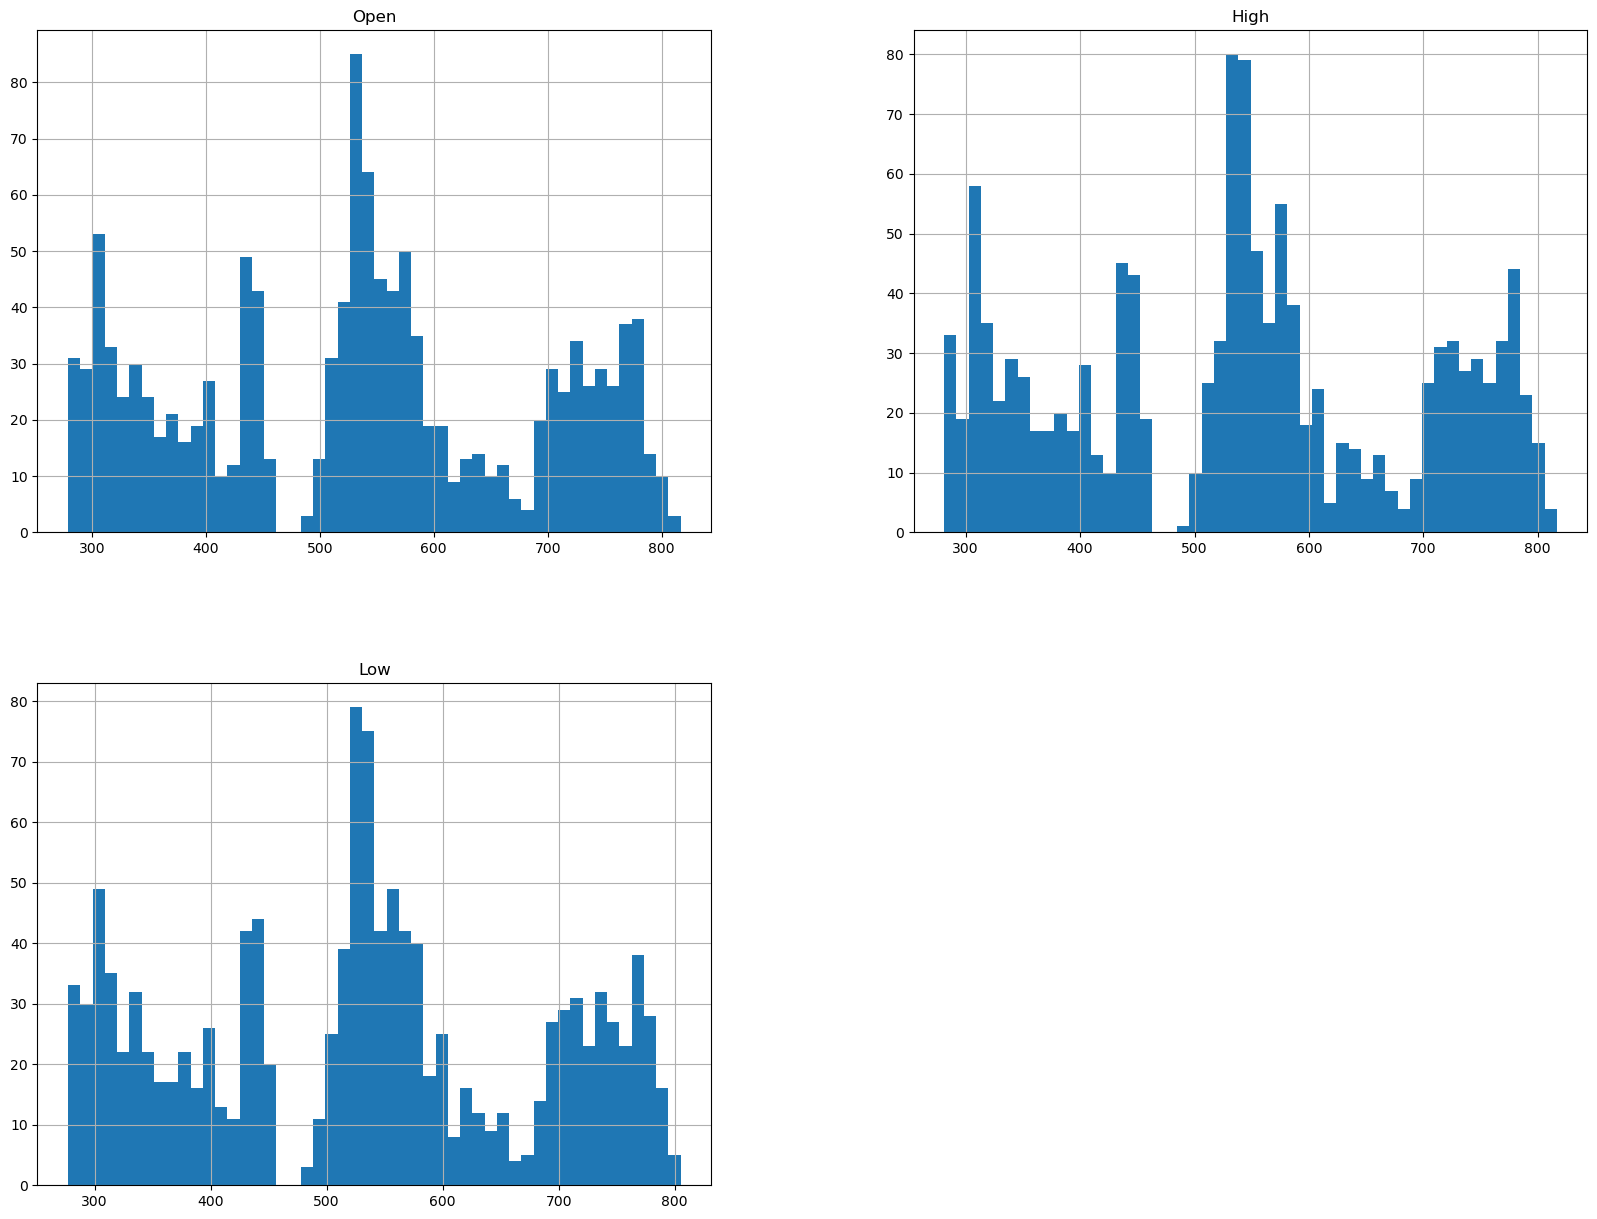

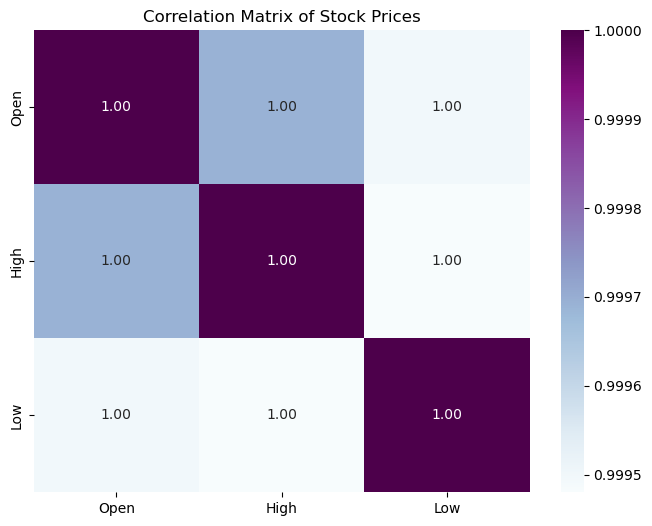

In [12]:
# Histograms
train_data.hist(bins=50, figsize=(20, 15))
plt.show()

# Correlation heatmap 
corr_matrix = train_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title("Correlation Matrix of Stock Prices")
plt.show()



In [13]:
#Extracting and normalising the data
from sklearn.preprocessing import MinMaxScaler
prices = train_data[['Open']].values
print(prices)

# Splitting into training and testing sets
train_size = len(prices) - 50
train, test = prices[:train_size], prices[train_size:]

# Reshaping
train = train.reshape(-1, 1)
print(train.shape)

# Normalize the prices
scaler = MinMaxScaler(feature_range=(0, 1))
prices_normalized = scaler.fit_transform(prices)
print(prices_normalized)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1208, 1)
[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


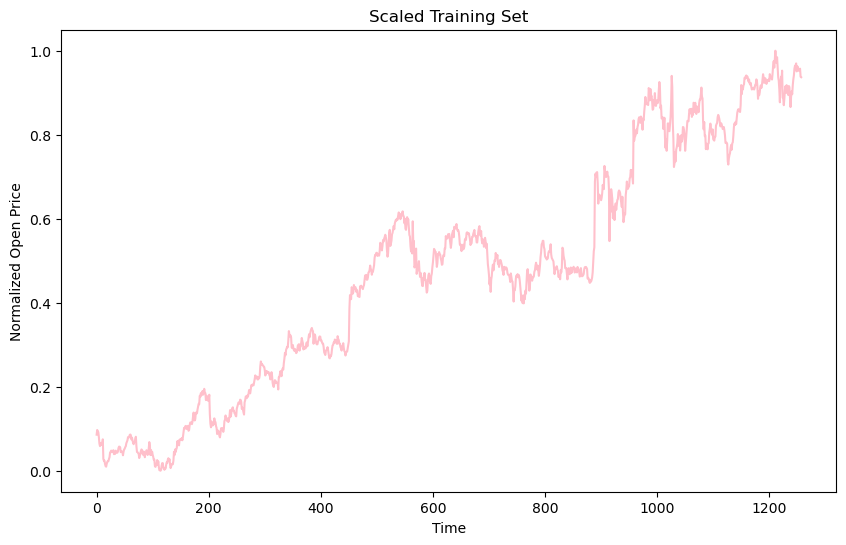

In [16]:
# Plotting the scaled training set
plt.figure(figsize=(10, 6))
plt.plot(prices_normalized,color="pink")
plt.title('Scaled Training Set')
plt.xlabel('Time')
plt.ylabel('Normalized Open Price')
plt.show()

In [15]:
X_train = []
Y_train = []
timesteps = 50

# Creating sequences 
for i in range(timesteps, len(prices_normalized)):
    X_train.append(prices_normalized[i - timesteps:i, 0])  
    Y_train.append(prices_normalized[i, 0])  

X_train, Y_train = np.array(X_train), np.array(Y_train)

# Reshaping X_train
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
print("X_train shape:", X_train.shape)

# Displaying a sample of X_train and Y_train
print("Sample of X_train:\n", X_train[:2])  
print("Sample of Y_train:\n", Y_train[:2])  


X_train shape: (1208, 50, 1)
Sample of X_train:
 [[[0.08581368]
  [0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]
  [0.0585423 ]
  [0.06568569]
  [0.06109085]
  [0.06639259]
  [0.0614257 ]
  [0.07474514]
  [0.02797827]
  [0.02379269]
  [0.02409033]
  [0.0159238 ]
  [0.01078949]
  [0.00967334]
  [0.01642607]
  [0.02100231]
  [0.02280676]
  [0.02273235]
  [0.02810849]
  [0.03212665]
  [0.0433812 ]
  [0.04475779]
  [0.04790163]
  [0.0440695 ]
  [0.04648783]
  [0.04745517]
  [0.04873875]
  [0.03936305]
  [0.04137213]
  [0.04034898]
  [0.04784582]
  [0.04325099]
  [0.04356723]
  [0.04286033]
  [0.04602277]
  [0.05398467]
  [0.05738894]
  [0.05714711]
  [0.05569611]
  [0.04421832]
  [0.04514845]
  [0.04605997]
  [0.04412531]
  [0.03675869]
  [0.04486941]
  [0.05065481]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]
  [0.0585423 ]
  [0.06568569]
  [0.06109085]
  [0.06639259]
  [0.0614257 ]
  [0.07474514]
  [0.02797827]
  [0.02379269]
  [0

In [17]:
Y_train

array([0.05214302, 0.05612397, 0.05818885, ..., 0.95725128, 0.93796041,
       0.93688146])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 50, 50)            2600      
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0     

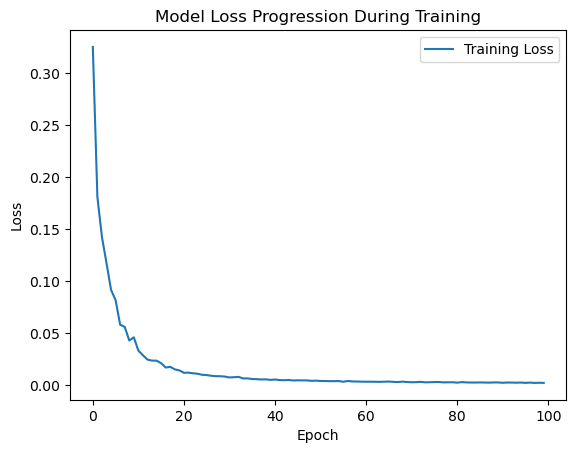

In [18]:
# Create and train RNN model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Define the input layer with the shape (timesteps, features)
Z = Input(shape=(X_train.shape[1], 1))

rnn_1 = SimpleRNN(units=50, activation="tanh", return_sequences=True)(Z)
drop_1 = Dropout(0.2)(rnn_1)
rnn_2 = SimpleRNN(units=50, activation="tanh", return_sequences=True)(drop_1)
drop_2 = Dropout(0.2)(rnn_2)
rnn_3 = SimpleRNN(units=50, activation="tanh", return_sequences=True)(drop_2)
drop_3 = Dropout(0.2)(rnn_3)
rnn_4 = SimpleRNN(units=50, activation="tanh")(drop_3)
drop_4 = Dropout(0.2)(rnn_4)
out = Dense(units=1)(drop_4)

# Create the RNN model
regres = Model(inputs=Z, outputs=out)
regres.compile(optimizer=Adam(), loss="mean_squared_error")
regres.summary()

# Fit the RNN model to the training data
history = regres.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=1)
plt.plot(history.history['loss'])
plt.title('Model Loss Progression During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss'])
plt.show()


2/2 [==============================] - 0s 7ms/step


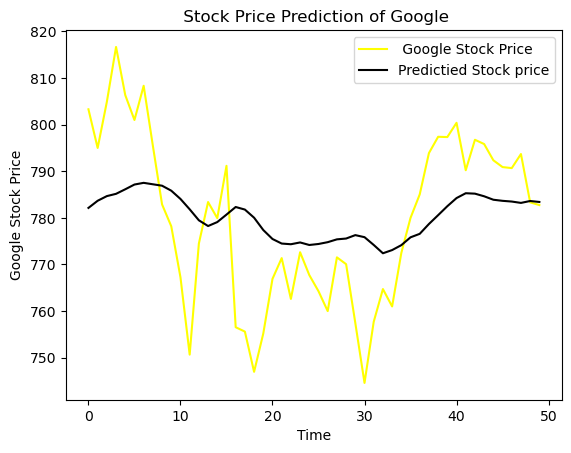

In [19]:
data_set = prices[len(prices) - len(test) - timesteps:]
data_set = scaler.transform(data_set)
X_test = []
for i in range(timesteps, data_set.shape[0]):
    X_test.append(data_set[i - timesteps:i, 0])
    
X_rnn = np.array(X_test)
X_rnn = np.reshape(X_rnn, (X_rnn.shape[0], X_rnn.shape[1], 1))
predic_price = regres.predict(X_rnn)
predic_price = scaler.inverse_transform(predic_price)
# Visualisation
plt.plot(test, color = "yellow", label = " Google Stock Price")
plt.plot(predic_price, color = "black", label = "Predictied Stock price")
plt.title(" Stock Price Prediction of Google")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

Epoch 1/50
1208/1208 [==============================] - 6s 3ms/step - loss: 0.0032
Epoch 2/50
1208/1208 [==============================] - 4s 3ms/step - loss: 0.0013
Epoch 3/50
1208/1208 [==============================] - 4s 3ms/step - loss: 0.0011
Epoch 4/50
1208/1208 [==============================] - 4s 3ms/step - loss: 0.0012
Epoch 5/50
1208/1208 [==============================] - 4s 3ms/step - loss: 9.6999e-04
Epoch 6/50
1208/1208 [==============================] - 4s 3ms/step - loss: 8.3301e-04
Epoch 7/50
1208/1208 [==============================] - 4s 3ms/step - loss: 8.1802e-04
Epoch 8/50
1208/1208 [==============================] - 4s 3ms/step - loss: 7.6805e-04
Epoch 9/50
1208/1208 [==============================] - 4s 3ms/step - loss: 7.3189e-04
Epoch 10/50
1208/1208 [==============================] - 4s 3ms/step - loss: 6.8370e-04
Epoch 11/50
1208/1208 [==============================] - 4s 3ms/step - loss: 7.0621e-04
Epoch 12/50
1208/1208 [==============================] - 

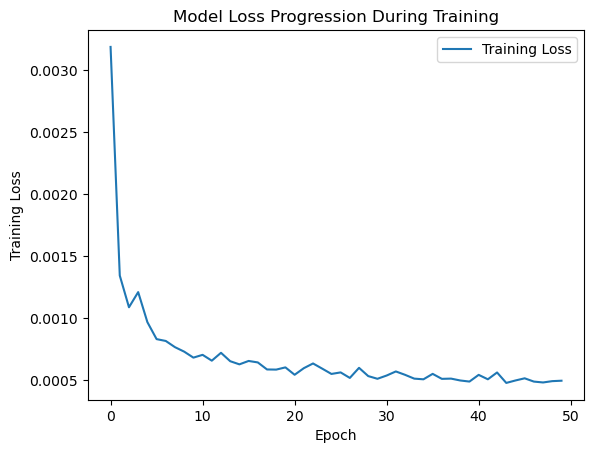

In [20]:
# Import necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Define a function to create the LSTM model
def create_lstm_model(input_shape, units=10, optimizer='adam', loss='mean_squared_error'):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss=loss)
    return model

# Define a function to reshape the input data
def reshape_input(X, time_steps):
    return np.reshape(X, (X.shape[0], 1, time_steps))

# Define training parameters
timesteps = X_train.shape[1]  # assuming X_train is already defined
batch_size = 1
epochs = 50

# Reshape the input data
trainX = reshape_input(X_train, timesteps)

# Create the LSTM model
lstm_model = create_lstm_model(input_shape=(1, timesteps))

# Training
history = lstm_model.fit(trainX, Y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Plot the training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss Progression During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])
plt.show()


2/2 [==============================] - 0s 17ms/step


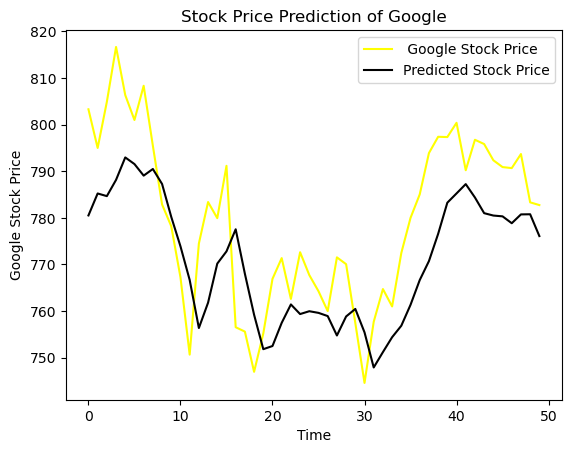

In [24]:

# Prepare test dataset
test_X = np.array(X_test)
test_X = test_X.reshape(test_X.shape[0], 1, test_X.shape[1])

# Predict with testX
predict_lstm = lstm_model.predict(test_X)
predict_lstm = scaler.inverse_transform(predict_lstm)

# plotting
plt.plot(test, color = "yellow", label = " Google Stock Price")
plt.plot(predict_lstm, color = "black", label = "Predicted Stock Price")
plt.title("Stock Price Prediction of Google")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()